In [ ]:
import sys
from google.colab import files
sys.path.insert(0,'/content/drive/MyDrive/IR-Project-Colab')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/IR-Project-Colab/Utilities.py /content 
!cp /content/drive/MyDrive/IR-Project-Colab/KNNImpute.py /content

In [ ]:
import Utilities  #THIS IS FOR GOOGLE COLAB USERS ONLY
import KNNImpute

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


from sklearn.feature_extraction.text import TfidfVectorizer   # Turning textual data into numeric for computation
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder               # For encoding categorical target attr
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn import svm   # Baseline
from sklearn.svm import SVC

# ------- Validation metrics
from sklearn.metrics import accuracy_score    
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import hamming_loss                  
from sklearn.metrics import classification_report



### ***READING CSV AND KNN IMPUTE***

In [ ]:
nltk.download('stopwords')
import pandas as pd
labels=["country", "sku_id", "title", "category_lvl1","category_lvl2","category_lvl3", "description", "price", "type"]

def getTrainingDataset():
    return pd.read_csv('data_train.csv', header=None, names=labels)  


def NullStatistics(df):
    missing_val = df.isnull().sum()
    print(missing_val)
    total_cells = np.product(df.shape)
    missing_percent = (missing_val.sum()/total_cells) *100
    print(f'\nThe missing data percent is: {missing_percent}')

trainingDataset=getTrainingDataset()

train_df,Y1,Y2,Y3=Utilities.Cleaning_Data_Utility(trainingDataset) #Utilities. hatadena yahan se 

NullStatistics(train_df)

unique_label_c1, unique_label_c2, unique_label_c3 = KNNImpute.preserve_label(train_df) #It has all unique values lying in ctg1 , 2 , 3 column

KNNImpute.encode(['category_lvl1', 'category_lvl2', 'category_lvl3'],train_df)        #Performed encoding for CTGLVL3 KNN

train_df_imputed = KNNImpute.impute(train_df)
train_df_imputed =  KNNImpute.clean_csv(train_df_imputed,train_df)
NullStatistics(train_df_imputed)

In [ ]:
print(len(unique_label_c1))
print(len(unique_label_c2))
print(len(unique_label_c3))

9
57
185


### ***FEATURE ENGINEERING***

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer   # Turning textual data into numeric for computation
X = train_df_imputed['Title_desc']
Y1 = train_df_imputed['category_lvl1']
Y2 = train_df_imputed['category_lvl2']
Y3 = train_df_imputed['category_lvl3']

vectorizer = TfidfVectorizer()  #Only once

vectorizer.fit(X)
X_tfidf = vectorizer.transform(X)
# print(X_tfidf)

### ***MODEL TRAINING***

### *CATEGORY* 1 

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# X_tfidf.reshape(-1,1)
# X_tfidf
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, Y1, test_size=0.3, random_state=42)
print (X_train.shape)
print (X_test.shape)

SVM_Classfier=SVC(kernel='linear' , random_state=0)
model1 = SVM_Classfier.fit(X_train,y_train)
Y_Pred_c1=model1.predict(X_test)


print(Y_Pred_c1)
90.47

(25398, 31798)
(10885, 31798)
[8. 0. 8. ... 8. 6. 3.]


90.47

### *CATEGORY 1 STATISTICS*

Accuracy score with linear kernel is : 
92.85254937988057
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.93       610
         1.0       0.93      0.87      0.90       897
         2.0       0.96      0.96      0.96      1756
         3.0       0.95      0.94      0.94      1144
         4.0       0.86      0.93      0.89      1847
         5.0       0.92      0.83      0.87       452
         6.0       0.95      0.96      0.95      2139
         7.0       0.87      0.85      0.86       733
         8.0       0.96      0.95      0.96      1307

    accuracy                           0.93     10885
   macro avg       0.93      0.91      0.92     10885
weighted avg       0.93      0.93      0.93     10885



Text(0.5, 87.0, 'Predicted lable')

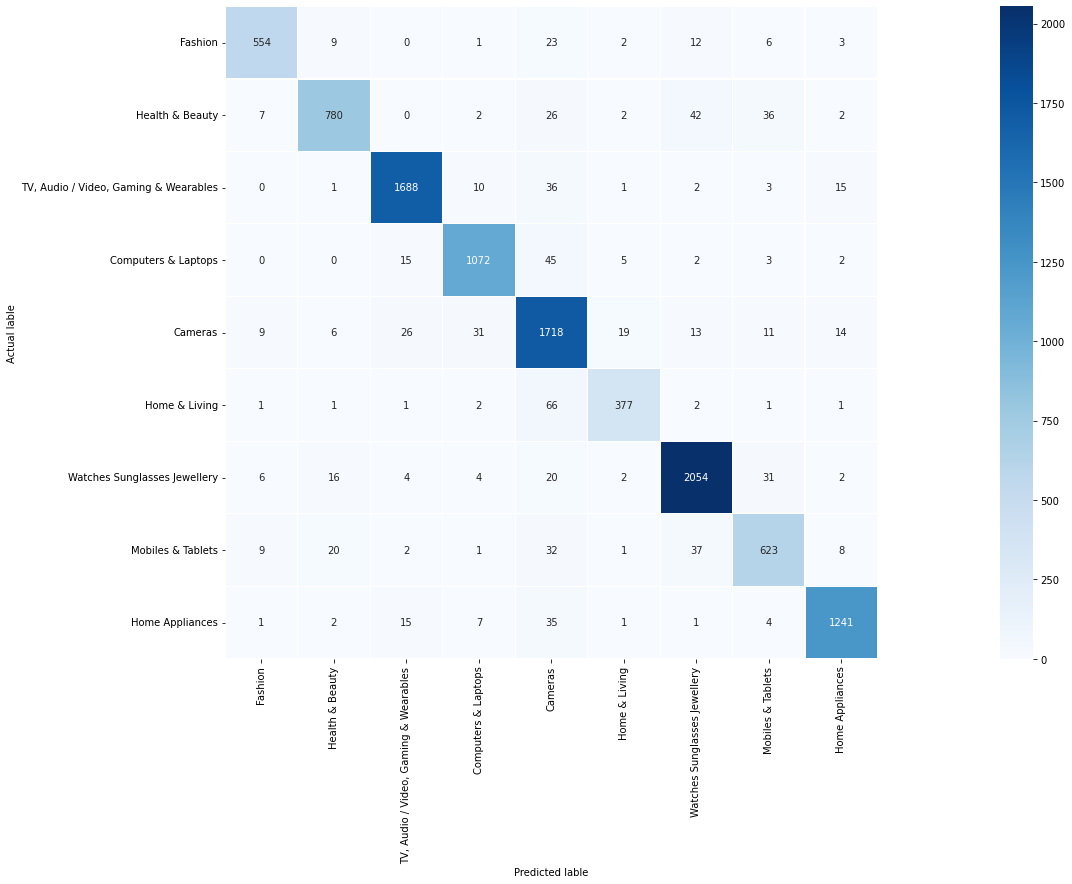

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

print('Accuracy score with linear kernel is : ')
print(metrics.accuracy_score(y_test,Y_Pred_c1)*100)
cf_matrix = confusion_matrix(y_test, Y_Pred_c1)
print(classification_report(y_test, Y_Pred_c1))

plt.figure(figsize=(44,12))

sns.heatmap(cf_matrix,annot=True ,fmt='d',  cmap='Blues',square=True ,cbar=True, linewidths=.10, xticklabels= unique_label_c1, yticklabels= unique_label_c1  )
plt.ylabel('Actual lable')
plt.xlabel('Predicted lable')

### *CATEGORY 2*

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, Y2, test_size=0.3, stratify= Y2, random_state=42)


SVM_Classfier=SVC(kernel='linear' , random_state=0)
model2=SVM_Classfier.fit(X_train,y_train)
Y_Pred_c2=model2.predict(X_test)
print(Y_Pred_c2)


[56. 35. 54. ...  8. 27. 35.]


### *CATEGORY 2 STATISTICS*

Accuracy score with linear kernel is : 
81.13738738738738


C:\Users\Computer Point\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Computer Point\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Computer Point\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92       662
         1.0       0.79      0.84      0.81       114
         2.0       0.91      0.43      0.59        23
         3.0       0.69      0.55      0.61        33
         4.0       0.73      0.51      0.60        43
         5.0       0.92      0.92      0.92        37
         6.0       1.00      0.14      0.25         7
         7.0       0.85      0.81      0.83        77
         8.0       0.86      0.76      0.81       146
         9.0       0.92      0.92      0.92        12
        10.0       0.97      0.88      0.92        34
        11.0       0.50      0.50      0.50         6
        12.0       1.00      0.73      0.84        11
        13.0       1.00      0.33      0.50         6
        14.0       0.91      0.93      0.92        44
        15.0       0.86      0.80      0.83        45
        16.0       0.94      0.91      0.92        32
        17.0       0.77    

Text(0.5, 87.0, 'Predicted lable')

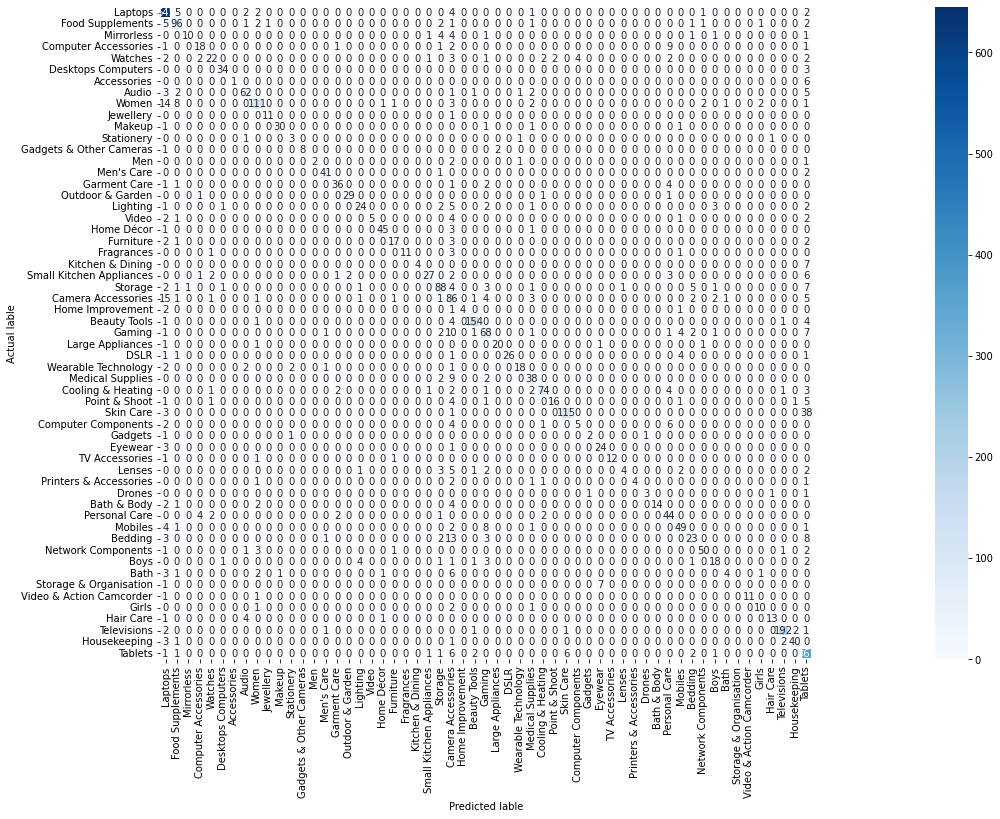

In [ ]:
print('Accuracy score with linear kernel is : ')
print(metrics.accuracy_score(y_test,Y_Pred_c2)*100)

cf_matrix = confusion_matrix(y_test, Y_Pred_c2)
print(classification_report(y_test, Y_Pred_c2))

plt.figure(figsize=(44,12))

sns.heatmap(cf_matrix,annot=True ,fmt='d',  cmap='Blues',square=True ,cbar=True, linewidths=.10, xticklabels= unique_label_c2, yticklabels= unique_label_c2  )
plt.ylabel('Actual lable')
plt.xlabel('Predicted lable')

### *CATEGORY 3*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, Y3, test_size=0.3, stratify= Y3, random_state=42)

SVM_Classfier=SVC(kernel='linear' , random_state=0)
model3=SVM_Classfier.fit(X_train,y_train)
Y_Pred_c3=model3.predict(X_test)



### *CATEGORY 3 STATISTICS*

Accuracy score with linear kernel is : 
70.4391891891892
              precision    recall  f1-score   support

         0.0       0.67      0.40      0.50         5
         1.0       0.75      0.84      0.79        56
         2.0       1.00      0.22      0.36         9
         3.0       0.50      0.42      0.45        12
         4.0       1.00      0.67      0.80         6
         5.0       0.88      0.64      0.74        11
         6.0       0.83      0.45      0.59        11
         7.0       1.00      0.50      0.67         6
         8.0       0.43      0.21      0.29        14
         9.0       0.87      0.91      0.89        85
        10.0       0.71      0.71      0.71        17
        11.0       0.25      0.17      0.20         6
        12.0       0.88      0.58      0.70        12
        13.0       1.00      0.43      0.60         7
        14.0       0.61      0.52      0.56        42
        15.0       0.97      0.91      0.94        33
        16.0       0.83 

C:\Users\Computer Point\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Computer Point\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Computer Point\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

Text(0.5, 949.1999999999997, 'Predicted lable')

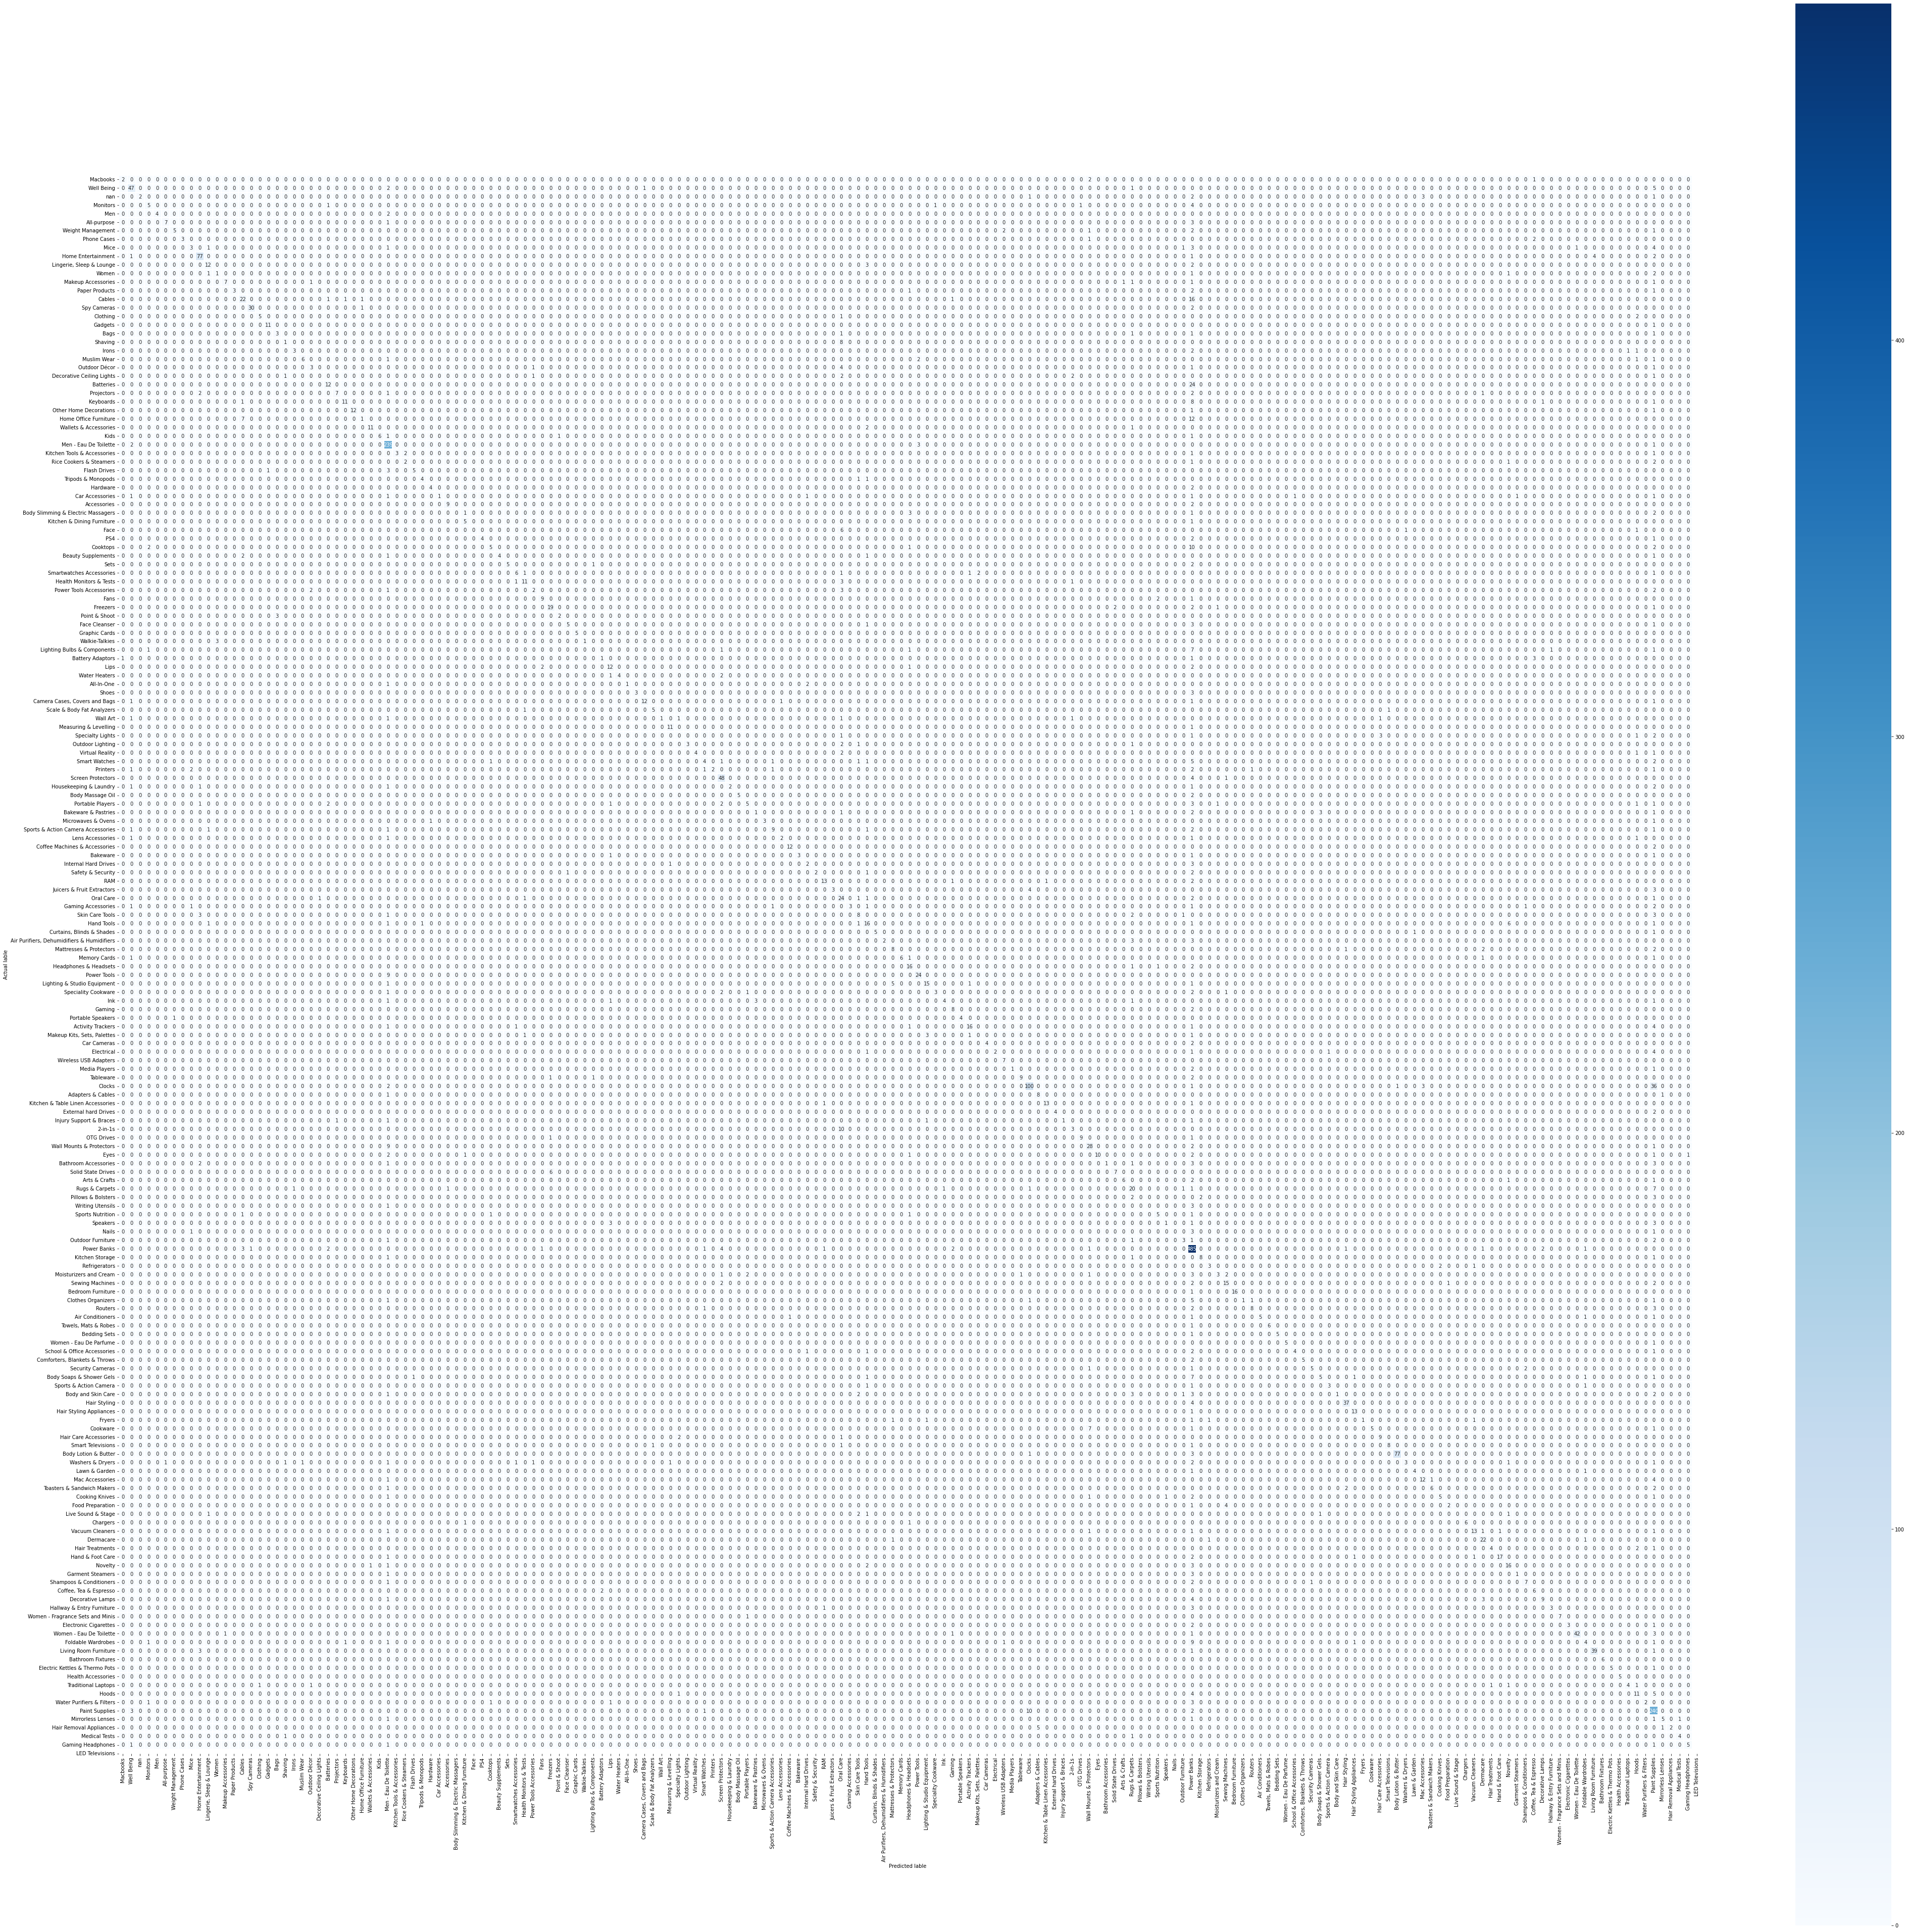

In [ ]:
print('Accuracy score with linear kernel is : ')
print(metrics.accuracy_score(y_test,Y_Pred_c3)*100)

cf_matrix = confusion_matrix(y_test, Y_Pred_c3)
print(classification_report(y_test, Y_Pred_c3))

plt.figure(figsize=(70,70))

sns.heatmap(cf_matrix,annot=True ,fmt='d',  cmap='Blues',square=True ,cbar=True, linewidths=.10, xticklabels= unique_label_c3, yticklabels= unique_label_c3  )
plt.ylabel('Actual lable')
plt.xlabel('Predicted lable')

### ***MODEL TESTING***

*DATA VALID CSV READ*

In [ ]:

labels=["country", "sku_id", "title", "category_lvl1","category_lvl2","category_lvl3", "description", "price", "type"]

def NullStatistics(df):
    missing_val = df.isnull().sum()
    print(missing_val)
    total_cells = np.product(df.shape)
    missing_percent = (missing_val.sum()/total_cells) *100
    print(f'\nThe missing data percent is: {missing_percent}')

testingDataset=pd.read_csv('data_valid.csv' , header=None, names=labels) 

train_df,Y1,Y2,Y3=Utilities.Cleaning_Data_Utility(testingDataset) 

NullStatistics(train_df)

unique_label_c1, unique_label_c2, unique_label_c3 = KNNImpute.preserve_label(train_df) 

KNNImpute.encode(['category_lvl1', 'category_lvl2', 'category_lvl3'],train_df)      

train_df_imputed = KNNImpute.impute(train_df)
train_df_imputed =  KNNImpute.clean_csv(train_df_imputed,train_df)
NullStatistics(train_df_imputed)

0        Apple MacBook Pro MGXC2ZP/A 16GB i7 15.4-inch ...
1        BRAND'S® American Ginseng Triple Pack (3x 6's)...
2        Canon EOS M10 Mirrorless Digital Camera 18MP w...
3        Dell LED Monitor 23" (E2316H) <div class="prod...
4        Esprit Tallac Brave Nubuck Sand ES107601001 Be...
                               ...                        
11833    Olen Swarovski Crystal ElementsLove Birds Aust...
11834    Adele Bethany BLACK Small ladies Shoulder bag ...
11835    Spigen Neo Hybrid Series Case for iPhone 7 Plu...
11836    Anti-wrinkle Backdrop for Photo Studio Photogr...
11837    Waterproof 170° Rear View Parking Car Camera w...
Name: titleDescp, Length: 11838, dtype: object
category_lvl1      0
category_lvl2      0
category_lvl3    687
titleDescp         0
dtype: int64

The missing data percent is: 1.4508362899138367


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


category_lvl1    0
category_lvl2    0
category_lvl3    0
Title_desc       0
dtype: int64

The missing data percent is: 0.0


In [ ]:
#Printing Unique Labels in Txt Files.


*FEATURE ENGINEERING*

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer   # Turning textual data into numeric for computation
X = train_df_imputed['Title_desc']
Y1 = train_df_imputed['category_lvl1']
Y2 = train_df_imputed['category_lvl2']
Y3 = train_df_imputed['category_lvl3']

# vectorizer = TfidfVectorizer()
# vectorizer.fit(X)   #Test (Unseen data is never fitted)
x_test_tfidf = vectorizer.transform(X)



### CATEGORY *1* PREDICTION

In [ ]:
y_pred_cat_one = model1.predict(x_test_tfidf)


CATEGORY 1 STATISTICS

In [ ]:
print(metrics.accuracy_score(Y1, y_pred_cat_one)*100)
cf_matrix = confusion_matrix(Y1, y_pred_cat_one)
print(classification_report(Y1, y_pred_cat_one))

plt.figure(figsize=(44,12))

sns.heatmap(cf_matrix,annot=True ,fmt='d',  cmap='Blues',square=True ,cbar=True, linewidths=.10, xticklabels= unique_label_c1, yticklabels= unique_label_c1  )
plt.ylabel('Actual lable')
plt.xlabel('Predicted lable')

### *CATEGORY 2*

In [ ]:
y_pred_cat_2 = model2.predict(x_test_tfidf)


CATEGORY 2 STATISTICS

In [ ]:
print(metrics.accuracy_score(Y2, y_pred_cat_2)*100)
cf_matrix = confusion_matrix(Y2, y_pred_cat_2)
print(classification_report(Y2, y_pred_cat_2))

plt.figure(figsize=(44,12))

sns.heatmap(cf_matrix,annot=True ,fmt='d',  cmap='Blues',square=True ,cbar=True, linewidths=.10, xticklabels= unique_label_c2, yticklabels= unique_label_c2  )
plt.ylabel('Actual lable')
plt.xlabel('Predicted lable')

85.38604494002365


### CATEGORY *3*

In [ ]:
y_pred_cat_3 = model3.predict(x_test_tfidf)
print(metrics.accuracy_score(Y3, y_pred_cat_3)*100)

75.57864504139212


CATEGORY 3 STATISTICS

In [ ]:
print(metrics.accuracy_score(Y3, y_pred_cat_3)*100)
cf_matrix = confusion_matrix(Y3, y_pred_cat_3)
print(classification_report(Y3, y_pred_cat_3))

plt.figure(figsize=(44,12))

sns.heatmap(cf_matrix,annot=True ,fmt='d',  cmap='Blues',square=True ,cbar=True, linewidths=.10, xticklabels= unique_label_c3, yticklabels= unique_label_c3  )
plt.ylabel('Actual lable')
plt.xlabel('Predicted lable')

In [ ]:
def decode_cat01(number):
    le =LabelEncoder()
    le.fit(unique_label_c1)
    LabelEncoder()
    # print(list(le.classes_))  # print to check classes
    le.transform(unique_label_c1)

    return str(le.inverse_transform([number]))

def decode_cat02(number):
    le =LabelEncoder()
    le.fit(unique_label_c2)
    LabelEncoder()
    # print(list(le.classes_))  # print to check classes
    le.transform(unique_label_c2)

    return str(le.inverse_transform([number]))

def decode_cat03(number):
    le =LabelEncoder()
    le.fit(unique_label_c3)
    LabelEncoder()
    # print(list(le.classes_))  # print to check classes
    le.transform(unique_label_c3)

    return str(le.inverse_transform([number]))
    

print(decode_cat01(1))
print(decode_cat02(29))
print(decode_cat03(98))


['Computers & Laptops']
['Laptops']
['Macbooks']


### ***MODEL SAVE***

In [ ]:
import pickle
pickle.dump(model1, open('model1.pickle', 'wb'))
pickle.dump(model2, open('model2.pickle', 'wb'))
pickle.dump(model3, open('model3.pickle', 'wb'))


In [ ]:
pickle.dump(model3, open('model3.pickle', 'wb'))


In [ ]:
os.listdir('.')

In [ ]:
pickle.dump(vectorizer, open("vectorizer.pickle", "wb"))

### ***QUERY TESTING***

In [ ]:
def Load_Svm_Models():
    model_c1_svm = pickle.load(open('model1.pickle', 'rb'))
    model_c2_svm = pickle.load(open('model2.pickle', 'rb'))
    model_c3_svm = pickle.load(open('model3.pickle', 'rb'))
    return model_c1_svm, model_c2_svm, model_c3_svm

# # def Load_Vectorizer():
def Predict_Query_SVM(query):
    tfidf_vectorizer = pickle.load(open('vectorizer.pickle','rb'))
    corpus_vocabulary = defaultdict(None, copy.deepcopy(tfidf_vectorizer.vocabulary_))
    corpus_vocabulary.default_factory = corpus_vocabulary.__len__
    m1,m2,m3=Load_Svm_Models()
    tfidf_transformer_query = TfidfVectorizer()
    tfidf_transformer_query.fit_transform(query)

    for word in tfidf_transformer_query.vocabulary_.keys():
        if word in tfidf_vectorizer.vocabulary_:
            corpus_vocabulary[word]

    tfidf_transformer_query_sec = TfidfVectorizer(vocabulary=corpus_vocabulary)
    query_tfidf_matrix = tfidf_transformer_query_sec.fit_transform(query)
    return m1.predict(query_tfidf_matrix), m2.predict(query_tfidf_matrix),m3.predict(query_tfidf_matrix)


In [ ]:
query="Laptop"
query=Utilities.PreProcessing(query)
print(query)
query=[query]

m1,m2,m3=Predict_Query_SVM(query)
Ctg1=decode_cat01(int(m1))
Ctg2=decode_cat02(int(m2))
Ctg3=decode_cat03(int(m3))
print(Ctg1,Ctg2,Ctg3)


laptop
SVC(kernel='linear', random_state=0)
['Computers & Laptops'] ['Computer Accessories'] ['Battery Adaptors']


In [ ]:
# from collections import defaultdict
# import copy

# corpus_vocabulary = defaultdict(None, copy.deepcopy(vectorizer.vocabulary_))
# corpus_vocabulary.default_factory = corpus_vocabulary.__len__

# tfidf_transformer_query = TfidfVectorizer()
# tfidf_transformer_query.fit_transform(query)

# for word in tfidf_transformer_query.vocabulary_.keys():
#     if word in vectorizer.vocabulary_:
#         corpus_vocabulary[word]

# tfidf_transformer_query_sec = TfidfVectorizer(vocabulary=corpus_vocabulary)
# query_tfidf_matrix = tfidf_transformer_query_sec.fit_transform(query)

# Category_1_Output=int(model1.predict(query_tfidf_matrix))
# Category_2_Output=int(model2.predict(query_tfidf_matrix))

# Category_3_Output=int(model3.predict(query_tfidf_matrix))

# Ctg1=decode_cat01(Category_1_Output)
# Ctg2=decode_cat02(Category_2_Output)
# Ctg3=decode_cat03(Category_3_Output)

# print(Ctg1,Ctg2,Ctg3)



['Watches Sunglasses Jewellery'] ['Watches'] ['Women']
